In [1]:
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = "/R2"
assert FOLDERNAME is not None, "[!] Enter the foldername."

import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

%cd /content/drive/My\ Drive/$FOLDERNAME
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1tSXKo37YgOYTon7kHV73mPNrZEhTINfW/R2


In [2]:
from supervision_transformation import *
from data_loader import *
from data_loader import *
from solver import *
from models import *
from experiments import *
from interpret import *
from utils import *
from experiments import *
from metrics import *

import torch
import torch.optim as optim
from torch.optim import lr_scheduler

In [3]:
INPUT_SIZE = 128
device,dtype = get_device_dtype()

using device: cuda


In [4]:
# coco_dataloader = get_COCO_dataloaders(6000,64,INPUT_SIZE)

In [51]:
cityscape_dataloader = get_citscape_dataloaders(2000,64,INPUT_SIZE)

In [31]:
# lfw = get_lfw_dataloaders(2000,64,INPUT_SIZE)

In [52]:
dataloader = cityscape_dataloader

In [8]:
# dataloader = to_noise_loader(dataloader,10)

In [53]:
imgs,target = next(iter(dataloader["val"]))

In [54]:
imgs,labels = create_rotate_supervision(imgs,None)

In [9]:
# imgs,target,bbox = next(iter(dataloader["val"]))

In [10]:
# imgs,labels,bbox = create_rotate_supervision(imgs,None,bbox)

In [9]:
class_names = {0:"0",1:"90",2:"180",3:"270"}
# class_names = {i:str(i) for i in range(10)}

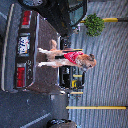

In [9]:
index = 4
img = unnormalize_to_PIL(imgs[index])
# print(y[index])
img

In [63]:
# file_name = "runSun Apr 24 14:48:44 2022_cityscape.pth"

In [65]:
file_name = "runSun Apr 24 14:48:44 2022_cityscape_99_final.pth"

In [56]:
model = get_six_layer_net(128,4,f"./saved_models/rotation_upstream/six_layer_net/{file_name}")

In [57]:
random_model = get_six_layer_net(128,4)

In [61]:
model = get_mobile_net(128,4,f"./saved_models/rotation_upstream/mobile_net/{file_name}")

In [62]:
random_model = get_mobile_net(128,4)

In [68]:
model = get_efficient_net(128,4,f"./saved_models/rotation_upstream/efficient_net/{file_name}")

In [69]:
random_model = get_efficient_net(128,4)

In [70]:
check_accuracy_test(dataloader["val"],model,create_rotate_supervision,device,dtype,'LFW')

Checking accuracy on test set
Got 1995 / 2000 correct (99.75)


0.9975

In [71]:
check_accuracy_test(dataloader["val"],random_model,create_rotate_supervision,device,dtype,'LFW')

Checking accuracy on test set
Got 430 / 2000 correct (21.50)


0.215

In [ ]:
indices = [3,17,64,72,81,88]
start=0#85
end = 5#90

In [61]:
#six layer net
model = torch.nn.Sequential( model[:-1])

In [62]:
#six layer net
random_model = torch.nn.Sequential( random_model[:-1])

In [34]:
#Efficient_net, mobile net
model.classifier = torch.nn.Sequential( model.classifier[0])

In [35]:
#Efficient_net, mobile net
random_model.classifier = torch.nn.Sequential( random_model.classifier[0])

In [ ]:
# y = torch.full_like(y,200)

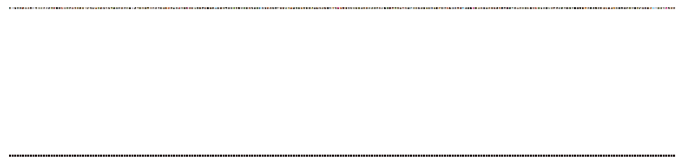

In [107]:
saliency = show_saliency_maps(random_model,imgs,labels,class_names,8e-3)

In [108]:
# np.count_nonzero(saliency[0])

In [109]:
# index = 1
avg = []
for index in range(saliency.shape[0]):
  if labels[index].item() == 0:
    s = np.zeros_like(saliency[index])
    x,y,w,h = json.loads(bbox[index])[0]
    x,y,w,h = round(x),round(y),round(w),round(h)
    s[x:x+w,y:y+h] = 1
    r = IOU(saliency[index],json.loads(bbox[index])[0])
    avg.append(r)

print(np.average(avg))

0.0


In [ ]:
0.28676720677861767


In [44]:
# np.count_nonzero(saliency[0] > 0)

In [ ]:
# np.count_nonzero(saliency[0] > 0.006)

13355

In [ ]:
saliency = show_saliency_maps(random_efficient_net,imgs[start:end],y[start:end],class_names,0.01)

In [ ]:
target_y = 0
create_class_visualization(target_y,efficient_net,dtype,class_names,num_iterations=500)

In [ ]:
file_name = "runSun Apr 24 15:58:55 2022_cityscape.pth"

In [ ]:
six_layer_net = get_six_layer_net(128,4,f"./saved_models/rotation_upstream/six_layer_net/{file_name}")

In [ ]:
random_six_layer_net = get_six_layer_net(128,4)

In [ ]:
check_accuracy_test(dataloader["val"],six_layer_net,create_rotate_supervision,device,dtype)

Checking accuracy on test set
Got 1987 / 2000 correct (99.35)


0.9935

In [ ]:
check_accuracy_test(dataloader["val"],random_six_layer_net,create_rotate_supervision,device,dtype)

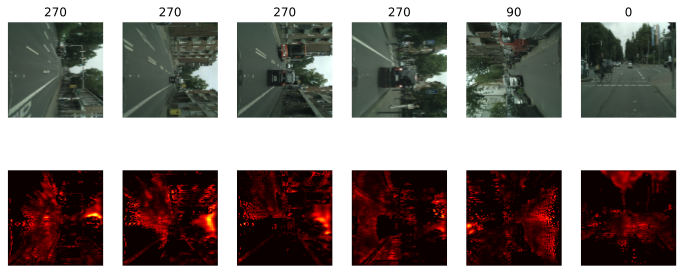

In [ ]:
show_saliency_maps(six_layer_net,imgs[indices],y[indices],class_names)

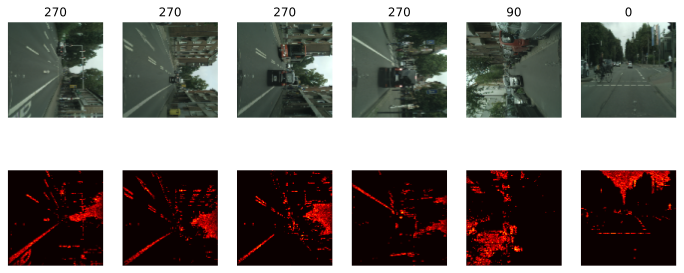

In [ ]:
show_saliency_maps(random_six_layer_net,imgs[indices],y[indices],class_names)

In [ ]:
file_name = "runSun Apr 24 20:01:49 2022.pth"

In [ ]:
mobile_net = get_mobile_net(128,4,f"./saved_models/rotation_upstream/mobile_net/{file_name}")

In [ ]:
random_mobile_net = get_mobile_net(128,4)

In [ ]:
check_accuracy_test(dataloader["val"],mobile_net,create_rotate_supervision,device,dtype)

Checking accuracy on test set
Got 10395 / 10588 correct (98.18)


0.9817718171514923

In [ ]:
check_accuracy_test(dataloader["val"],random_mobile_net,create_rotate_supervision,device,dtype)

Checking accuracy on test set
Got 2840 / 10588 correct (26.82)


0.26822818284850775

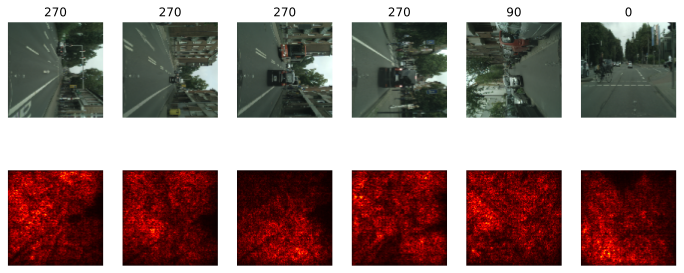

In [ ]:
show_saliency_maps(mobile_net,imgs[indices],y[indices],class_names)

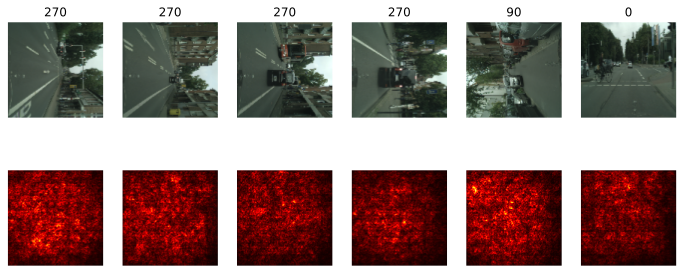

In [ ]:
show_saliency_maps(random_mobile_net,imgs[indices],y[indices],class_names)